In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load and preprocess the data 
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
cols = list(data.columns)
cols_data = cols[1:]
cols_data

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

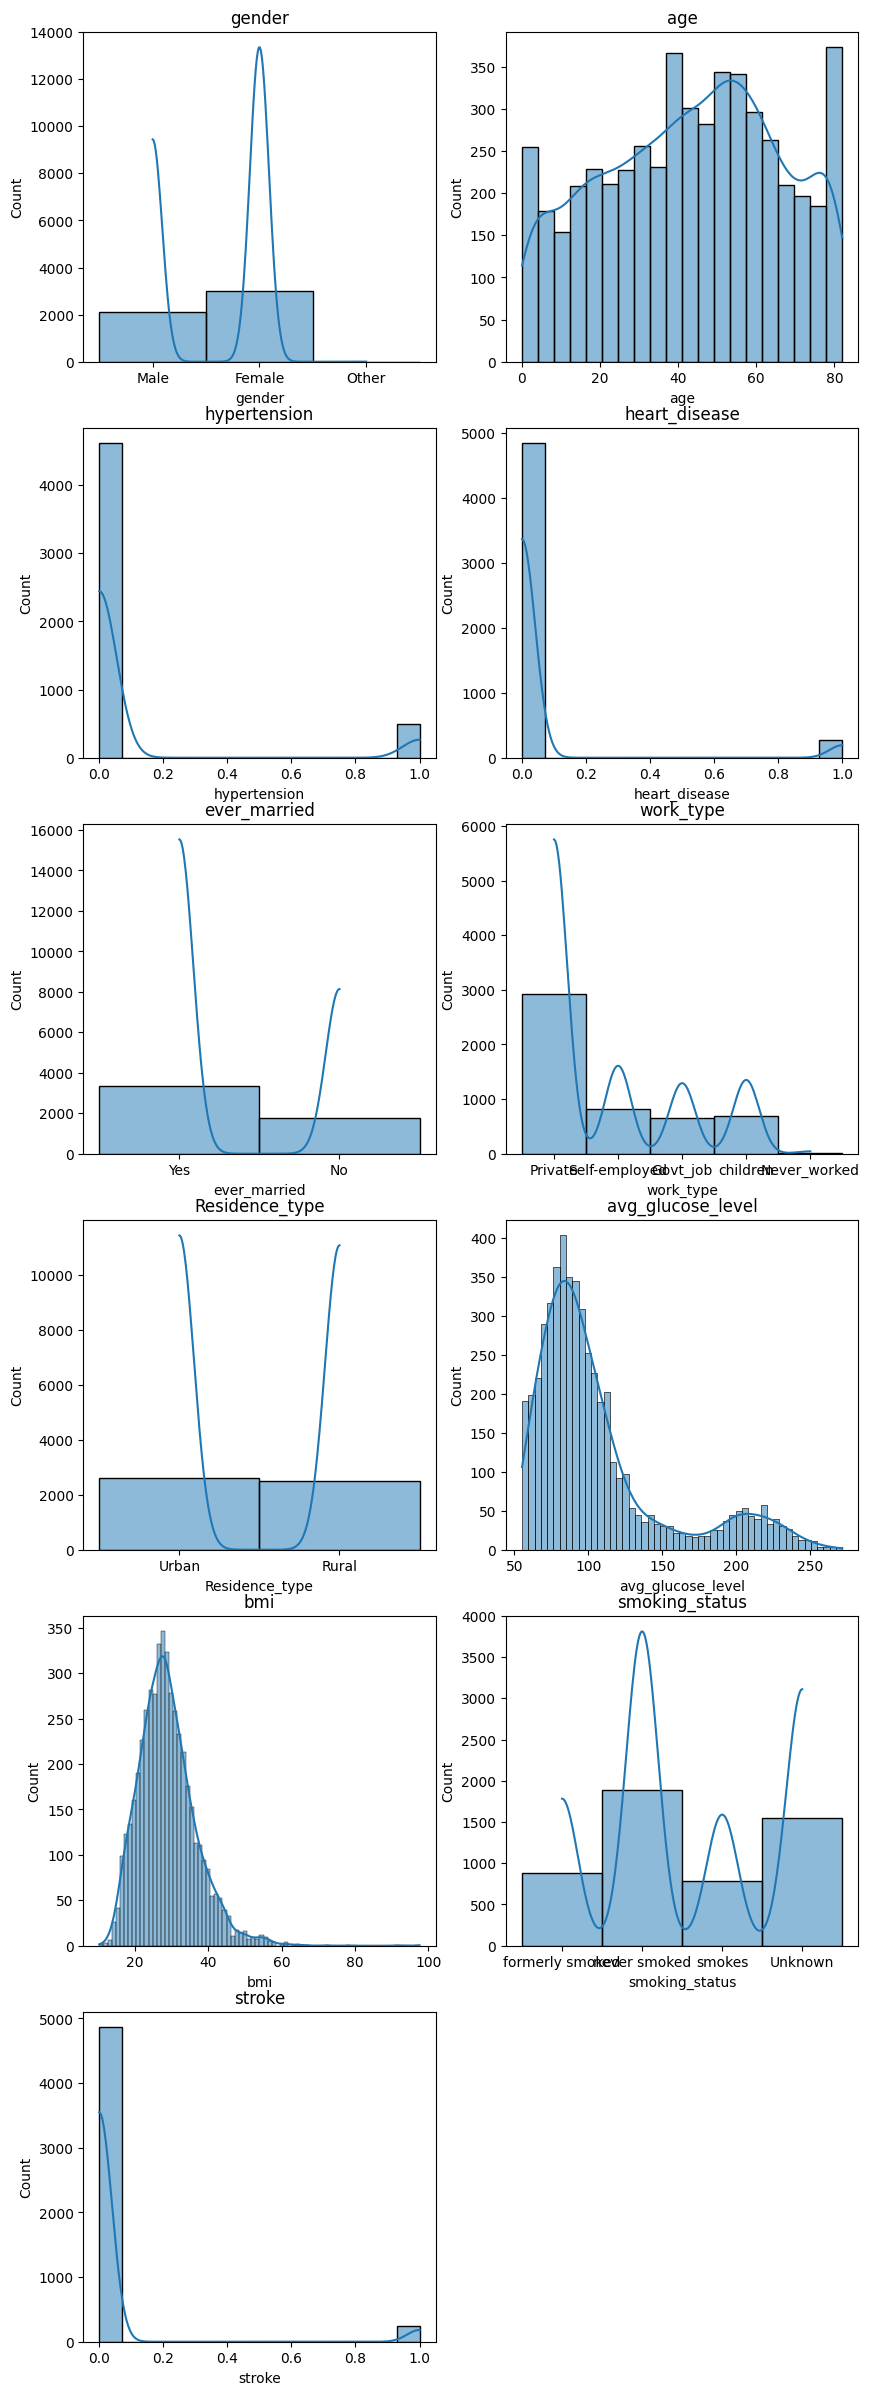

In [4]:
plt.figure(figsize=(10, 30))
for i in range(len(cols_data)):
    plt.subplot(6, 2, i+1)
    sns.histplot(data[cols_data[i]], kde=True)
    plt.title(cols_data[i])


In [5]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [6]:
data[data["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [7]:
data = data.drop(data[data["gender"] == "Other"].index)

In [8]:
data[data["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
print(data["bmi"].mean())
print(data["bmi"].median())

28.894559902200488
28.1


In [11]:
bmi_mean = data["bmi"].mean()
data["bmi"] = data["bmi"].fillna(bmi_mean)

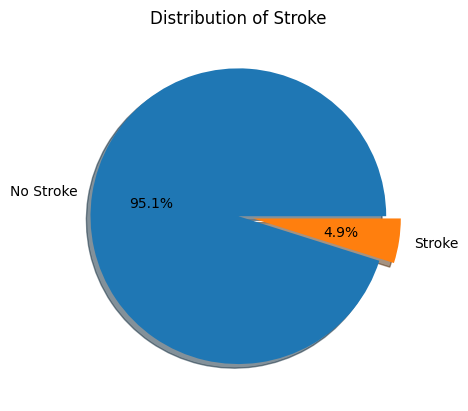

In [12]:
# Define the labels and values for the pie plot
labels = ['No Stroke', 'Stroke']
values = data.stroke.value_counts()

# Define the explode values to separate the slices
explode = (0, 0.1)

# Plot the pie plot
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Stroke')

# Display the plot
plt.show()


In [13]:
data.bmi.isnull().sum() 

0

In [14]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Average Glucose Level')

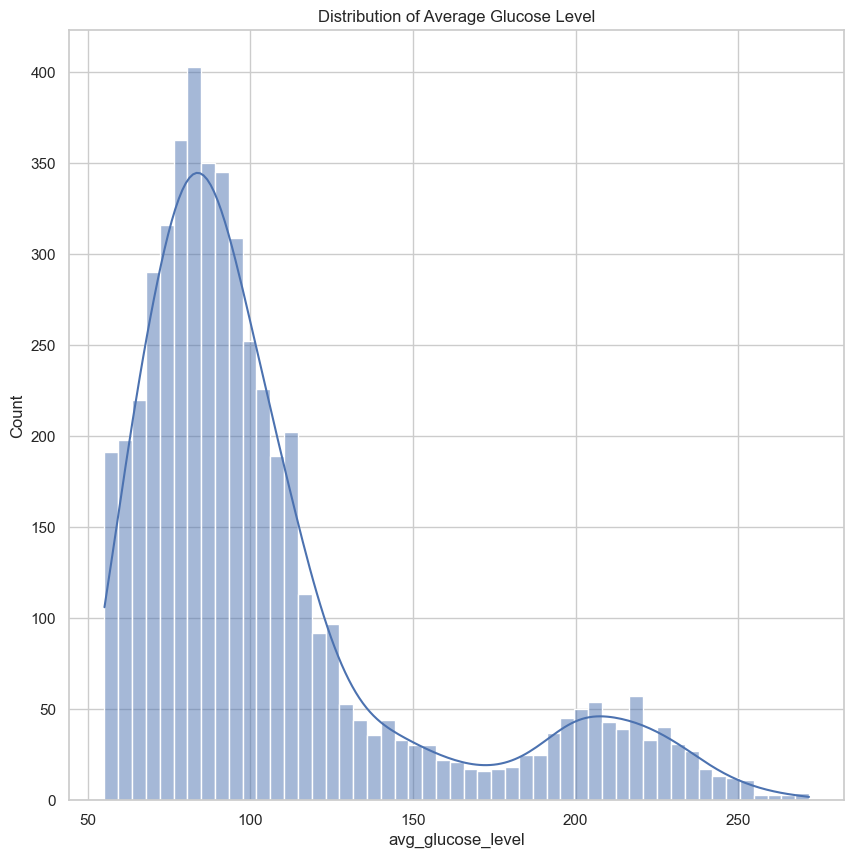

In [15]:
sns.set_theme(style="whitegrid")    
fig = plt.figure(figsize=(10, 10))
sns.histplot(data["avg_glucose_level"], label="avg_glucose_level", kde=True)
plt.title("Distribution of Average Glucose Level")  


Text(0.5, 1.0, 'Distribution of BMI')

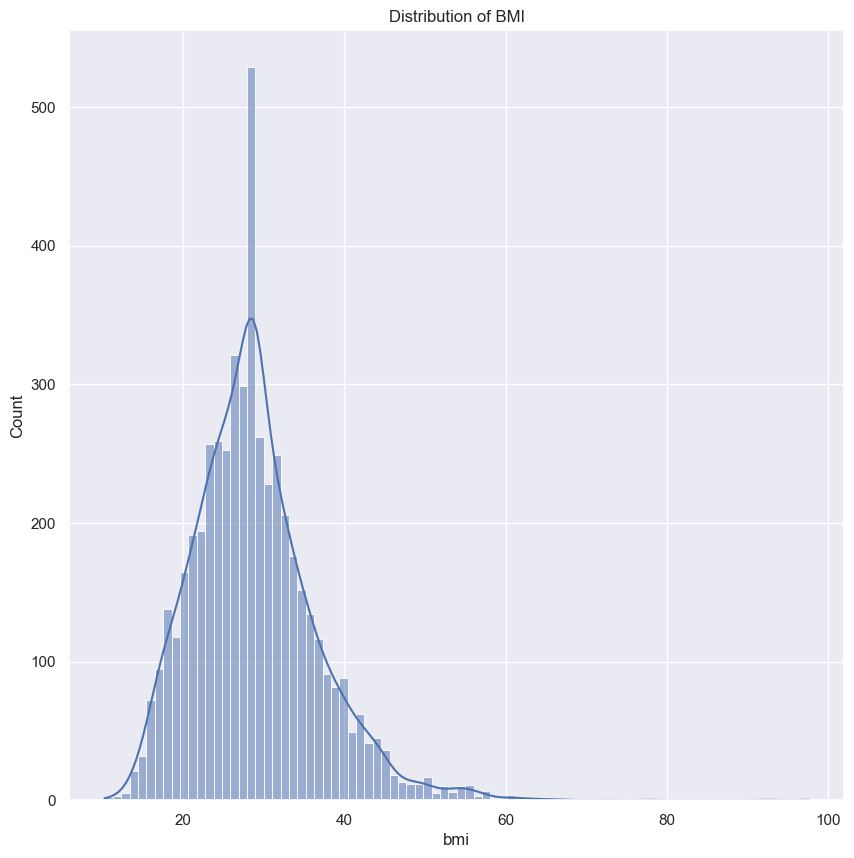

In [16]:
sns.set_theme(style="darkgrid")    
fig = plt.figure(figsize=(10, 10))
sns.histplot(data["bmi"], label="bmi", kde=True)
plt.title("Distribution of BMI") 

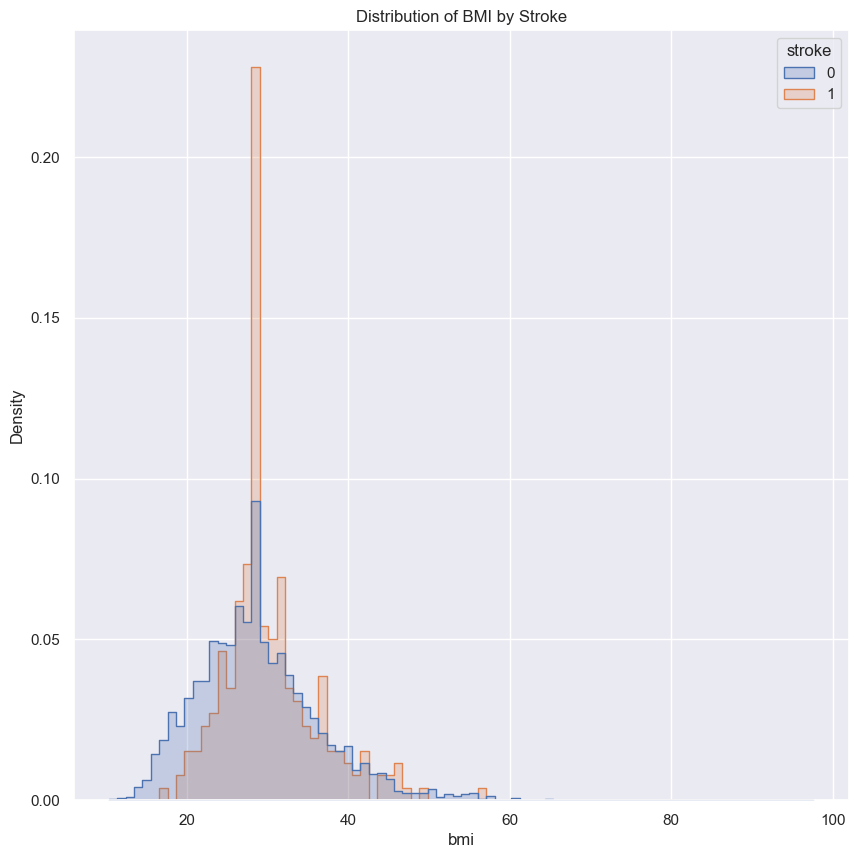

In [17]:
plt.figure(figsize=(10, 10))
sns.histplot(data,
             x="bmi", hue="stroke",
             element="step", 
             stat="density", common_norm=False)
plt.title("Distribution of BMI by Stroke")
plt.show()  


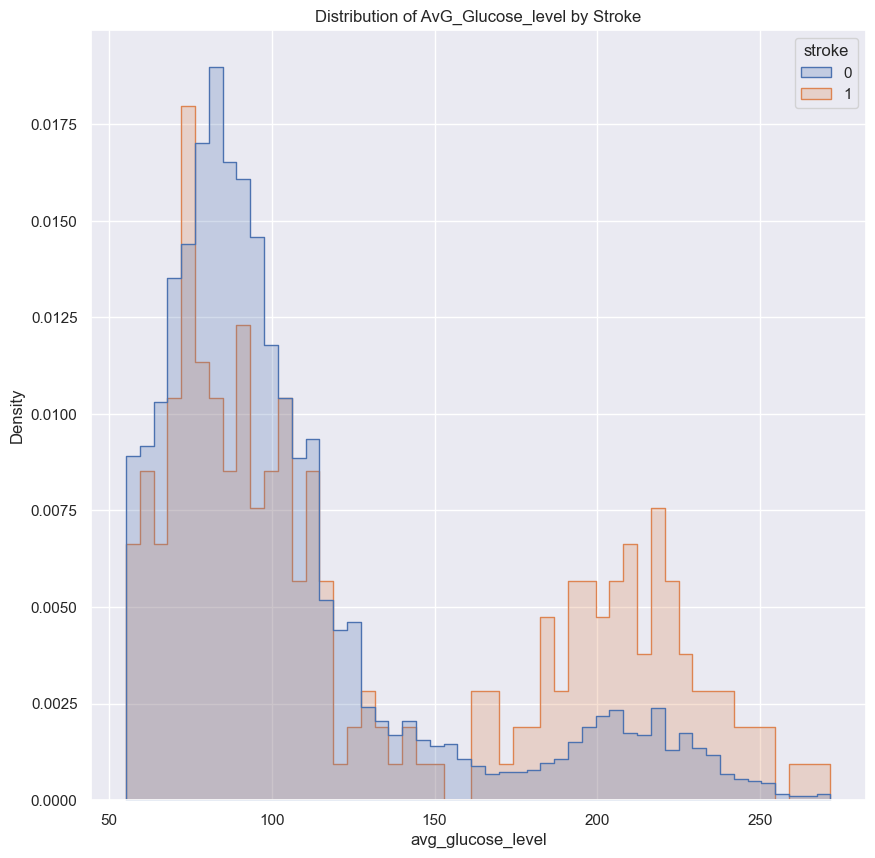

In [18]:
plt.figure(figsize=(10, 10))
sns.histplot(data,
             x="avg_glucose_level", hue="stroke",
             element="step", 
             stat="density", common_norm=False)
plt.title("Distribution of AvG_Glucose_level by Stroke")
plt.show()

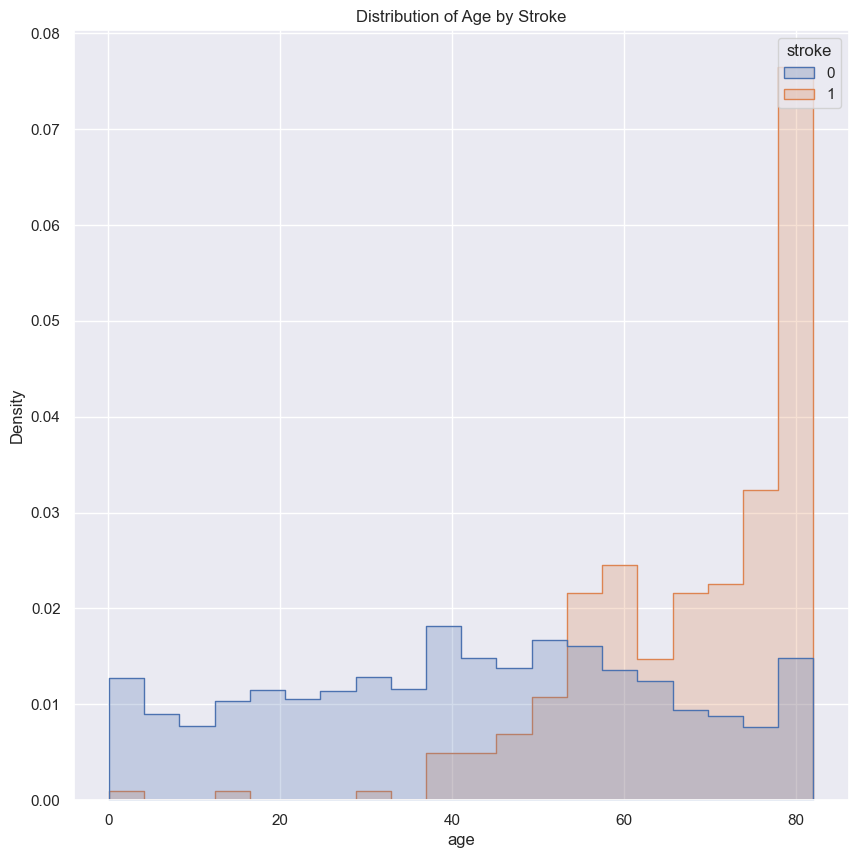

In [19]:
plt.figure(figsize=(10, 10))
sns.histplot(data,
             x="age", hue="stroke",
             element="step", 
             stat="density", common_norm=False)
plt.title("Distribution of Age by Stroke")
plt.show()

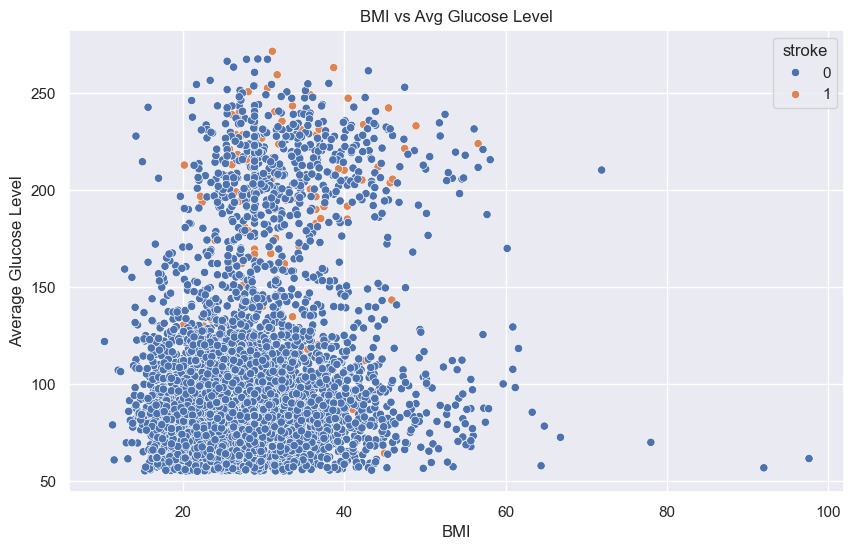

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='avg_glucose_level', hue='stroke')
plt.title('BMI vs Avg Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()


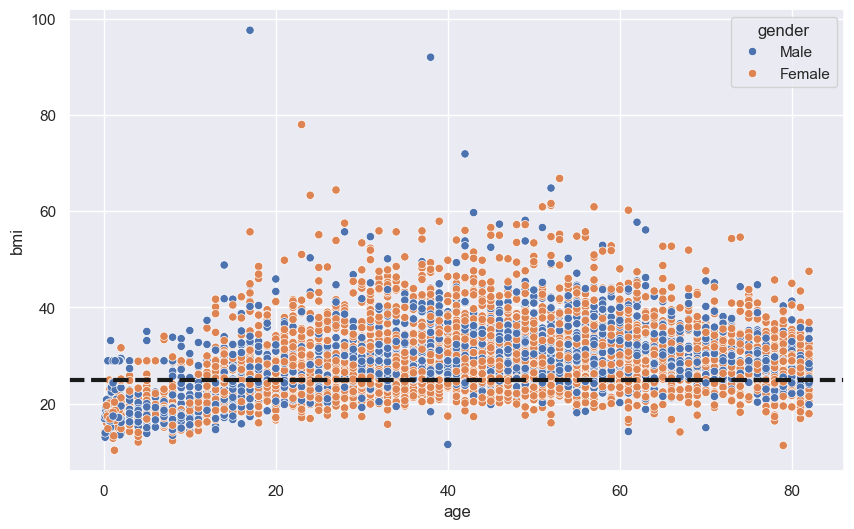

In [21]:
plt.figure(figsize=(10, 6))
fig = sns.scatterplot(data=data, x='age', y='bmi', hue='gender')
fig.axhline(y=25, linewidth=3, color='k', linestyle='--')
plt.show()

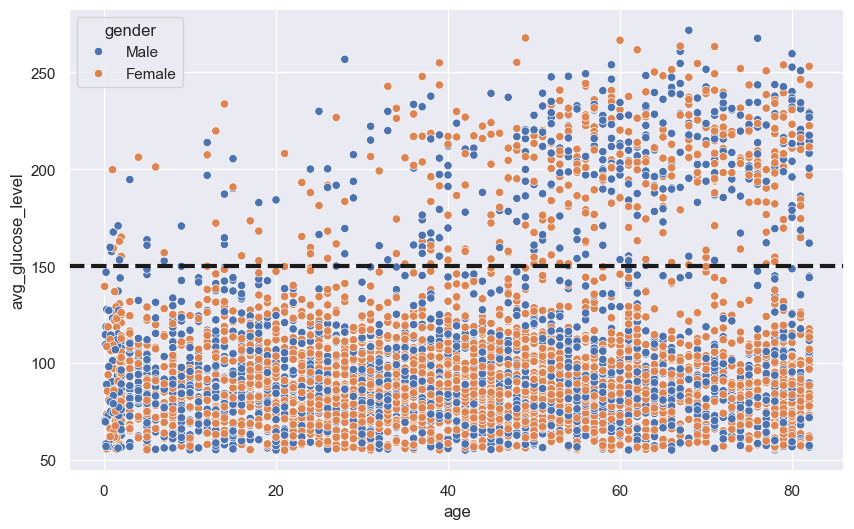

In [22]:
plt.figure(figsize=(10, 6))
fig = sns.scatterplot(data=data, x='age', y='avg_glucose_level', hue='gender')
fig.axhline(y=150, linewidth=3, color='k', linestyle='--')
plt.show()

In [23]:
data.drop('id', axis=1, inplace=True)

In [24]:
obj_cols = ["gender" , "ever_married","Residence_type"]
le = LabelEncoder()


for col in obj_cols:
    print(f"value counts of Column: {col}")
    print(data.loc[:, col].value_counts())
    data[col] = le.fit_transform(data[col]) 
    print(f"The classes labeled from 0 are: ",  le.classes_ , end="\n================================\n")


value counts of Column: gender
gender
Female    2994
Male      2115
Name: count, dtype: int64
The classes labeled from 0 are:  ['Female' 'Male']
value counts of Column: ever_married
ever_married
Yes    3353
No     1756
Name: count, dtype: int64
The classes labeled from 0 are:  ['No' 'Yes']
value counts of Column: Residence_type
Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64
The classes labeled from 0 are:  ['Rural' 'Urban']


In [26]:
data = pd.get_dummies(data)

In [27]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,False,False,True,False,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.89456,1,False,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.50000,1,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.40000,1,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.00000,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,False,False,True,False,False,False,False,True,False
5106,0,81.0,0,0,1,1,125.20,40.00000,0,False,False,False,True,False,False,False,True,False
5107,0,35.0,0,0,1,0,82.99,30.60000,0,False,False,False,True,False,False,False,True,False
5108,1,51.0,0,0,1,0,166.29,25.60000,0,False,False,True,False,False,False,True,False,False
